In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import PoissonRegressor
from sklearn.metrics import r2_score
import numpy as np

In [2]:
df = pd.read_csv("data.csv")
df.head()
print(len(df))

336645


In [3]:
even_number = df["Even_number"].values.reshape(-1,1)

combination = df["combination"]


In [4]:
model = PoissonRegressor()
model.fit(even_number,combination)

PoissonRegressor()

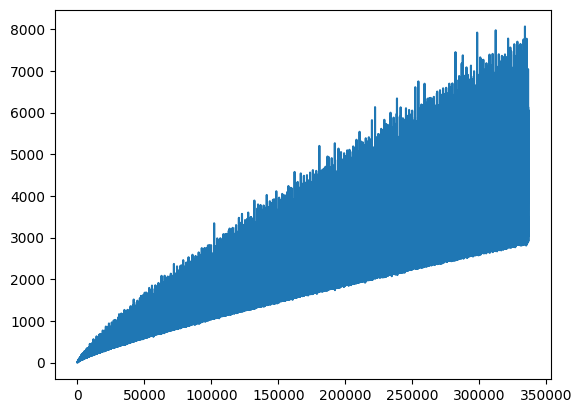

In [5]:

pred = model.predict(df["Even_number"].values.reshape(-1,1)[::10])

even_number_plt = df["Even_number"][::10]
combination_plt = df["combination"][::10]
plt.plot(combination_plt)



In [28]:
import warnings
warnings.filterwarnings('ignore')
function_approx = np.poly1d(np.polyfit(df["Even_number"],combination,30))


coeffs = function_approx.coefficients
equation = " + ".join(f"{coeff:.2e}x^{degree}" for degree, coeff in enumerate(reversed(coeffs)) if coeff != 0)
print(f"y = {equation}")

y = 1.60e+01x^0 + 1.49e-02x^1 + -2.17e-07x^2 + 4.26e-12x^3 + -5.42e-17x^4 + 4.42e-22x^5 + -2.31e-27x^6 + 7.52e-33x^7 + -1.34e-38x^8 + 5.89e-45x^9 + 1.96e-50x^10 + -1.65e-56x^11 + -3.80e-62x^12 + 1.77e-68x^13 + 8.40e-74x^14 + 2.85e-80x^15 + -1.43e-85x^16 + -1.97e-91x^17 + 8.83e-98x^18 + 5.06e-103x^19 + 3.49e-109x^20 + -7.49e-115x^21 + -1.45e-120x^22 + 7.66e-127x^23 + 3.75e-132x^24 + -4.45e-138x^25 + 1.42e-144x^26


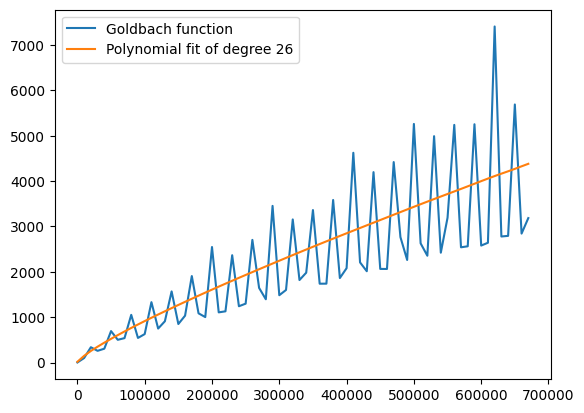

In [32]:

values = map(function_approx,df["Even_number"])
plt.plot(df["Even_number"][::5000],combination[::5000],label = "Goldbach function")
plt.plot(df["Even_number"][::5000],list(values)[::5000],label = "Polynomial fit of degree 26")
plt.legend()
plt.show()

In [30]:
values = map(function_approx,df["Even_number"])
print(combination.shape)
score = r2_score(combination, np.array(list(values)))
print("The accuracy of our model is {}%".format(round(score, 2) *100))

(336645,)
The accuracy of our model is 57.99999999999999%


In [31]:
from sklearn.metrics import mean_squared_error ,mean_absolute_error
import numpy as np
values = map(function_approx,df["Even_number"])
score = np.sqrt(mean_absolute_error(combination,np.array(list(values)) ))
print("The Mean Absolute Error of our Model is {}".format(round(score, 2)))

The Mean Absolute Error of our Model is 28.48
